<a href="https://colab.research.google.com/github/dyong00/2020-2-AI/blob/master/%EC%88%98%EC%97%85%EC%9E%90%EB%A3%8C/14W_%ED%8C%A8%EC%85%98_MNIST_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기 및 정규화

In [ ]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


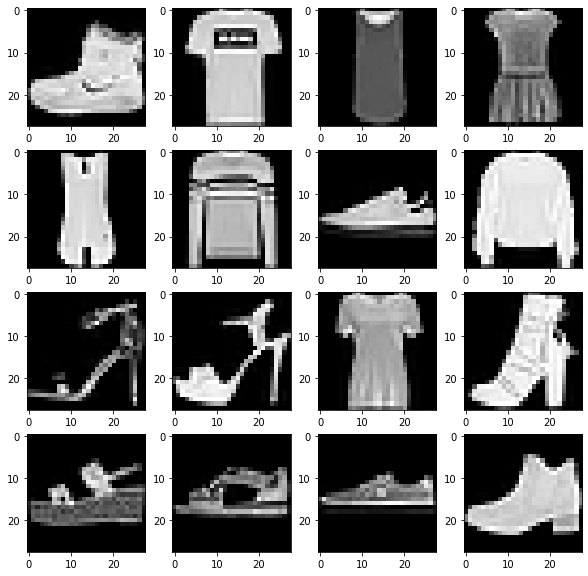

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [ ]:
import matplotlib.pyplot as plt

# 전체 그래프의 크기를 width = 10, height = 10으로 지정합니다. 
plt.figure(figsize=(10, 10))
for c in range(16): 
  # 4행 4열로 지정한 그리드에서 c+1번째의 칸에 그래프를 그립니다. 1~16번째 칸을 채우게 됩니다. 
  plt.subplot(4,4,c+1)
  plt.imshow(train_X[c].reshape(28,28), cmap='gray')

plt.show()

# 훈련 데이터이 1~16번째 까지의 라벨 프린트합니다. 
print(train_Y[:16])

# 딥러닝 모델 생성(컨볼루션 신경망 모델 정의)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32), 
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(units=128, activation='relu'), 
    tf.keras.layers.Dense(units=10, activation='softmax')                             
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# 컨볼루션 신경망 모델 학습

In [ ]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 161s 114ms/step - loss: 0.4661 - accuracy: 0.8323 - val_loss: 0.3930 - val_accuracy: 0.8601
Epoch 2/10
1407/1407 [==============================] - 160s 114ms/step - loss: 0.3422 - accuracy: 0.8764 - val_loss: 0.3700 - val_accuracy: 0.8680
Epoch 3/10
1407/1407 [==============================] - 165s 117ms/step - loss: 0.2863 - accuracy: 0.8957 - val_loss: 0.3782 - val_accuracy: 0.8703
Epoch 4/10
1407/1407 [==============================] - 160s 114ms/step - loss: 0.2460 - accuracy: 0.9097 - val_loss: 0.3946 - val_accuracy: 0.8659
Epoch 5/10
1407/1407 [==============================] - 160s 114ms/step - loss: 0.2097 - accuracy: 0.9212 - val_loss: 0.4038 - val_accuracy: 0.8689
Epoch 6/10
1407/1407 [==============================] - 160s 114ms/step - loss: 0.1870 - accuracy: 0.9293 - val_loss: 0.5132 - val_accuracy: 0.8625
Epoch 7/10
1407/1407 [==============================] - 161s 115ms/step - loss: 0.1620 - accuracy: 0.9397 - val_

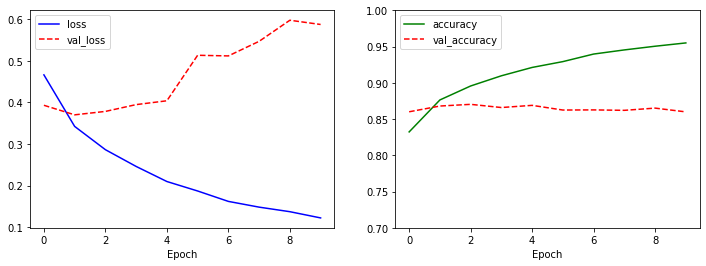

[0.6141896843910217, 0.8567000031471252]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32), 
  tf.keras.layers.MaxPool2D(strides=(2,2)), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64), 
  tf.keras.layers.MaxPool2D(strides=(2,2)), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=128, activation='relu'), 
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(units=10, activation='softmax')                             
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [ ]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 47s 33ms/step - loss: 0.4543 - accuracy: 0.8373 - val_loss: 0.3496 - val_accuracy: 0.8736
Epoch 2/10
1407/1407 [==============================] - 46s 33ms/step - loss: 0.3484 - accuracy: 0.8749 - val_loss: 0.3135 - val_accuracy: 0.8827
Epoch 3/10
1407/1407 [==============================] - 47s 33ms/step - loss: 0.3077 - accuracy: 0.8901 - val_loss: 0.3098 - val_accuracy: 0.8899
Epoch 4/10
1407/1407 [==============================] - 47s 33ms/step - loss: 0.2837 - accuracy: 0.8971 - val_loss: 0.3147 - val_accuracy: 0.8884
Epoch 5/10
1407/1407 [==============================] - 47s 33ms/step - loss: 0.2619 - accuracy: 0.9044 - val_loss: 0.2945 - val_accuracy: 0.8944
Epoch 6/10
1407/1407 [==============================] - 47s 33ms/step - loss: 0.2471 - accuracy: 0.9082 - val_loss: 0.2918 - val_accuracy: 0.8941
Epoch 7/10
1407/1407 [==============================] - 47s 33ms/step - loss: 0.2308 - accuracy: 0.9144 - val_loss: 0.2989 -

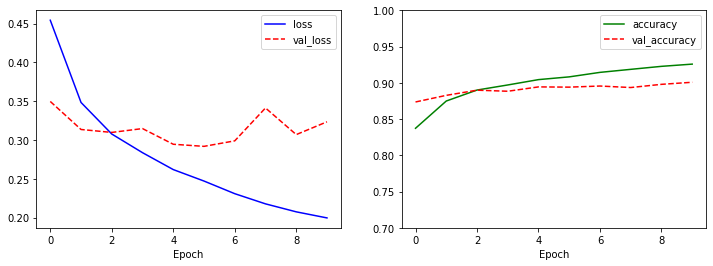

[0.3455764055252075, 0.8944000005722046]

In [ ]:
# history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)), 
  tf.keras.layers.Dropout(rate=0.5), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),    
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),  
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=512, activation='relu'), 
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=10, activation='softmax')                           
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)        

In [ ]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 560s 398ms/step - loss: 0.5830 - accuracy: 0.7887 - val_loss: 0.3166 - val_accuracy: 0.8817
Epoch 2/10
1407/1407 [==============================] - 561s 399ms/step - loss: 0.3695 - accuracy: 0.8664 - val_loss: 0.2830 - val_accuracy: 0.8952
Epoch 3/10
1407/1407 [==============================] - 559s 397ms/step - loss: 0.3260 - accuracy: 0.8830 - val_loss: 0.2586 - val_accuracy: 0.8991
Epoch 4/10
1407/1407 [==============================] - 554s 394ms/step - loss: 0.3041 - accuracy: 0.8905 - val_loss: 0.2492 - val_accuracy: 0.9052
Epoch 5/10
1407/1407 [==============================] - 554s 394ms/step - loss: 0.2853 - accuracy: 0.8967 - val_loss: 0.2325 - val_accuracy: 0.9125
Epoch 6/10
1407/1407 [==============================] - 555s 394ms/step - loss: 0.2742 - accuracy: 0.9012 - val_loss: 0.2198 - val_accuracy: 0.9206
Epoch 7/10
1407/1407 [==============================] - 556s 395ms/step - loss: 0.2669 - accuracy: 0.9037 - val_

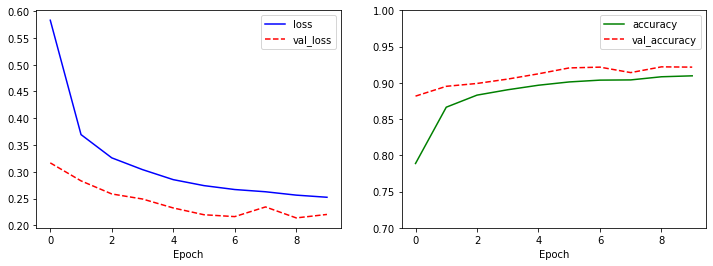

[0.23271147906780243, 0.9156000018119812]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)